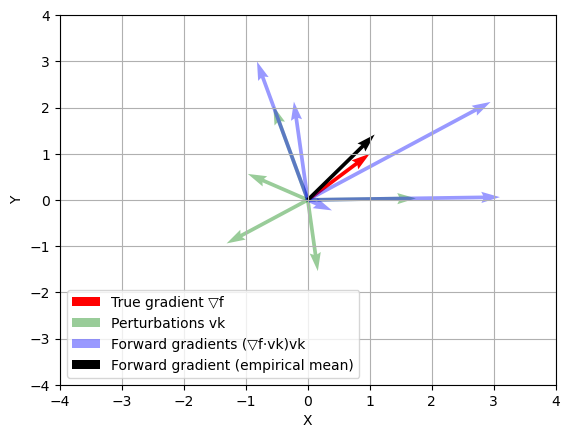

In [3]:
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(42)

# 生成示例数据
A = torch.tensor([1, 1])  # 2维向量A
# B = torch.randn(5, 2)  # 由10个2维向量组成的矩阵B
B = torch.tensor([[ -0.9667, 0.5627],
        [ 0.1622, -1.5422],
        # [ 1.4436, -0.1894],
        [-1.3098, -0.9422],
        [1.7434, 0.0341],
        # [ 0.6153,  0.4494],
        # [ 0.7127,  1.4480],
        [-0.5552,  2.0305]])
# t = torch.randn(5, 2)
# B = torch.concat([B,t])

# 计算矩阵C
C = B*((B * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)
# 计算向量D
D = torch.mean(C, dim=0)

# 绘制向量A
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='True gradient ▽f')

# 绘制矩阵B中的每个向量
for i,b in enumerate(B):
    label = 'Perturbations vk' if i == 0 else '_nolegend_'
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.4, label=label)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C):
    label = 'Forward gradients (▽f·vk)vk' if i == 0 else '_nolegend_'
    plt.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.4, label=label)
# 绘制向量D
plt.quiver(0, 0, D[0], D[1], angles='xy', scale_units='xy', scale=1, color='black', label='Forward gradient (empirical mean)')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('figure 3a')
plt.legend(loc=3)
plt.grid(True)
plt.show()
# plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-forward-gradient-3d_wyz.jpg")

     

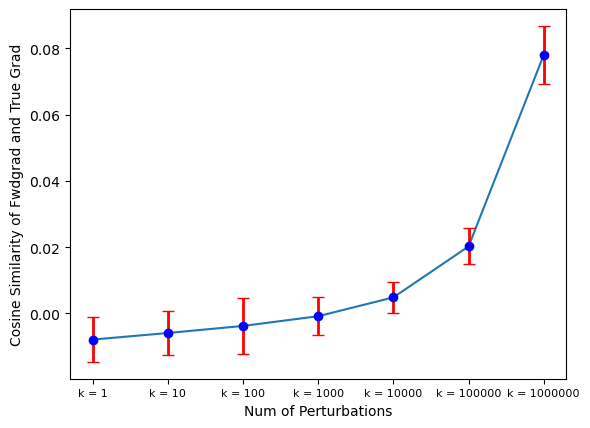

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


data = defaultdict(list)

layer = "distilbert.transformer.layer.0.output_adapters.adapters.rotten tomato.adapter_up.weight"
# layer = "distilbert.transformer.layer.0.output_adapters.adapters.rotten tomato.adapter_down.0.weight"
# layer = "distilbert.transformer.layer.0.output_adapters.adapters.rotten tomato.adapter_up.bias"
k_list = [f"k = {k}," for k in [1,10,100,1000,10000,100000,1000000]]

with open("/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_1000_numerical_check_cos.log") as f:
    for line in f:
        if layer in line:
            for k in k_list:
                if k in line:
                    cosine = float(line[line.rfind("cos_sim")+10:line.rfind("v_shape")-2])
                    data[k].append(cosine)
                    break
for key in data:
    data[key] = np.array(data[key])
y = [data[key].mean() for key in data]
yerr = [data[key].std() for key in data]
# yerr = [data[key].var() for key in data]
plt.plot(range(len(y)),y)
plt.errorbar(range(len(y)),y,yerr,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.xticks(range(len(y)),[k[:-1] for k in k_list],size=8)
#fmt :   'o' ',' '.' 'x' '+' 'v' '^' '<' '>' 's' 'd' 'p'
# plt.tital("figure 3b")
plt.xlabel("Num of Perturbations")
plt.ylabel("Cosine Similarity of Fwdgrad and True Grad")
plt.show()
# plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-forward-gradient-similarity_wyz.png")


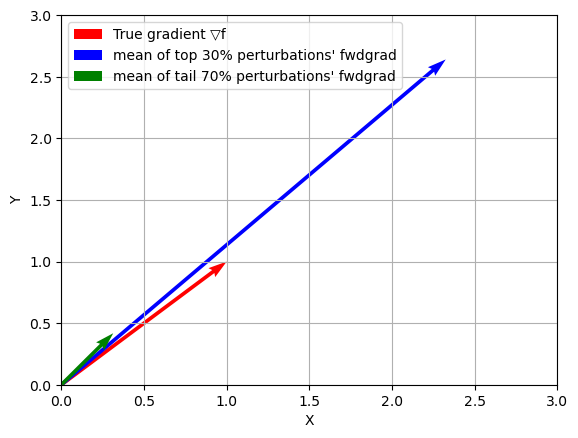

In [11]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

# 生成示例数据
A = torch.tensor([1, 1])  # 2维向量A
for _ in range(10):
    B = torch.randn(100, 2)  # 由10个2维向量组成的矩阵B

# 计算每个向量与向量A的点积之和
dot_products = torch.sum(B * A, dim=1).abs()

# 对矩阵B中的向量按点积之和排序
sorted_indices = torch.argsort(dot_products, descending=True)
sorted_B = B[sorted_indices]

num_vectors = sorted_B.shape[0]
ten_percent = int(0.3 * num_vectors)

# 划分为前10%的部分和后10%的部分
B1 = sorted_B[:ten_percent]
B2 = sorted_B[ten_percent:]



# 计算矩阵C
C1 = B1*((B1 * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)

# 计算向量D
D1 = torch.mean(C1, dim=0)

# 计算矩阵C
C2 = B2*((B2 * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)

# 计算向量D
D2 = torch.mean(C2, dim=0)

# 绘制向量A
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='True gradient ▽f')


# 绘制向量D
plt.quiver(0, 0, D1[0], D1[1], angles='xy', scale_units='xy', scale=1, color='blue', label="mean of top 30% perturbations' fwdgrad")
# 绘制向量D
plt.quiver(0, 0, D2[0], D2[1], angles='xy', scale_units='xy', scale=1, color='green', label="mean of tail 70% perturbations' fwdgrad")

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=2)
plt.grid(True)
# plt.title("figure 4a")
# plt.show()
plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-sampling-example_wyz.pdf")



/tmp/ipykernel_13129/3825945202.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')
/tmp/ipykernel_13129/3825945202.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(cmap=cmap))


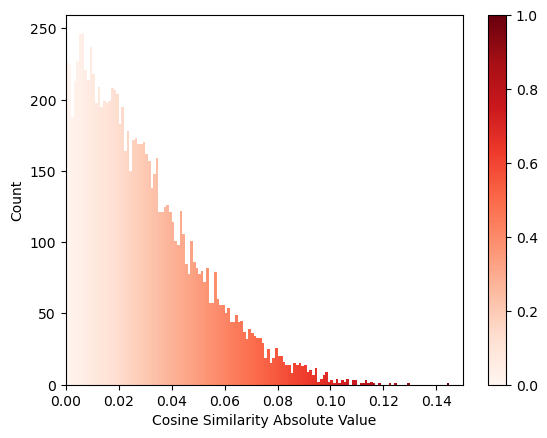

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# 向量A
torch.manual_seed(42)
vector_A = torch.randn(768)

# 矩阵B，由1000个768维向量组成
matrix_B = torch.randn(10000, 768)

# 计算余弦相似度
cosine_similarities = torch.cosine_similarity(vector_A.unsqueeze(0), matrix_B, dim=1)
abs_cosine_similarities = torch.abs(cosine_similarities)

# 设置横坐标范围和间隔
start = 0.0
end = abs_cosine_similarities.max().item()
interval = 0.001

# 统计每个范围内的向量数量和余弦相似度的平均值
counts = []
means = []
bins = []

for i in range(int((end - start) / interval) + 1):
    lower = start + i * interval
    upper = start + (i + 1) * interval
    count = torch.sum((abs_cosine_similarities >= lower) & (abs_cosine_similarities < upper)).item()
    mean = torch.mean(cosine_similarities[(abs_cosine_similarities >= lower) & (abs_cosine_similarities < upper)].abs()).item()/end
    counts.append(count)
    means.append(mean)
    bins.append(lower)

# 创建颜色映射
cmap = plt.cm.get_cmap('Reds')

# 根据余弦相似度的平均值设置颜色
colors = [cmap(mean) for mean in means]

# 绘制条形图
plt.bar(bins, counts, width=interval, align='edge', color=colors)
plt.xlabel('Cosine Similarity Absolute Value')
plt.xlim(0,0.15)
plt.ylabel('Count')
# plt.title('figure 4b')
plt.colorbar(ScalarMappable(cmap=cmap))
plt.show()
# plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-sampling-statistic_wyz.pdf")


In [37]:
sum(counts[:30])/sum(counts)

0.6002

In [38]:
bins[30]

0.03

In [39]:
sum(counts[i]*means[i] for i in range(30) if counts[i] != 0)/sum([counts[i]*means[i] for i in range(len(means)) if counts[i] != 0])

0.2969804411764475

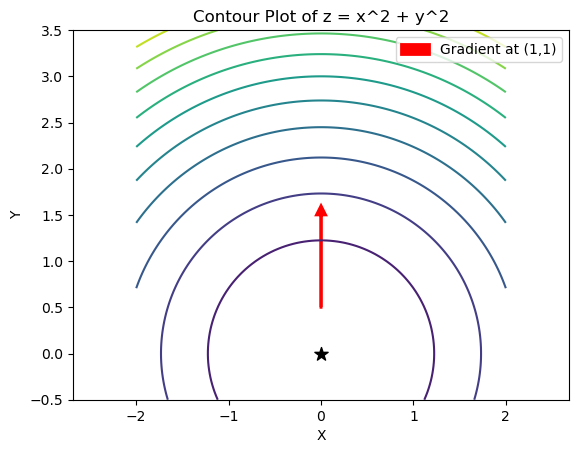

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数z和其梯度
def z_func(x, y):
    return x**2 + y**2

def gradient_x(x, y):
    return 2 * x

def gradient_y(x, y):
    return 2 * y

# 生成x和y的坐标
x = np.linspace(-2, 2, 100)
y = np.linspace(-0.5, 3.5, 100)
X, Y = np.meshgrid(x, y)

# 计算z的值
Z = z_func(X, Y)

# 绘制等高线图
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# 在点(1, 1)处标注梯度
gradient_at_point = (gradient_x(0, 0.5), gradient_y(0, 0.5))
plt.arrow(0, 0.5, gradient_at_point[0], gradient_at_point[1],linewidth = 2, head_width=0.1, head_length=0.1, fc='r', ec='r', label='Gradient at (0,0.5)')
plt.scatter(0,0,marker='*', color='black', s=100)

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of z = x^2 + y^2')

# 显示图形
plt.legend()
plt.axis('equal')  # 设置坐标轴刻度相等，保证等高线图是圆的
plt.show()
